In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import random
from sklearn.linear_model import LogisticRegression
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from graphviz import Source

from sklearn.tree import export_graphviz
from IPython.display import SVG

In [9]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
display(train)

,class,x1,y1,x2,y2,size,diag
0,1,0,0,0,20,20.00,46.10
1,1,19,0,19,8,8.00,46.10
2,1,0,20,19,8,22.47,46.10
3,1,0,20,8,42,23.41,46.10
4,1,19,8,8,42,35.74,46.10
...,...,...,...,...,...,...,...
5104,10,18,39,22,33,7.21,49.19
5105,10,22,33,22,20,13.00,49.19
5106,10,22,20,18,14,7.21,49.19
5107,10,18,14,0,8,18.97,49.19


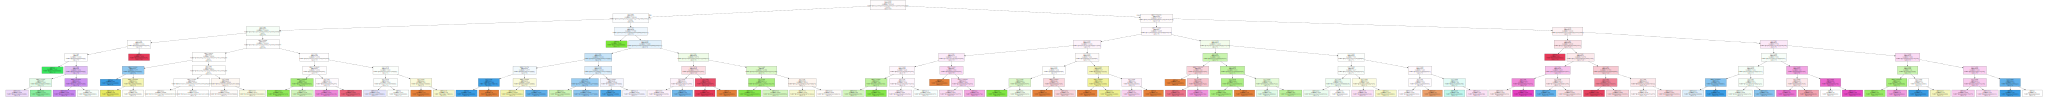

In [38]:
feature_cols = ['x1', 'y1', 'x2', 'y2', 'size', 'diag']
X = test[feature_cols]
y = test[["class"]]

treeclf = DecisionTreeClassifier(max_depth=7, random_state=3)
treeclf.fit(X, y)

graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
#                                     class_names=['0', '1'], filled = True))
                                    class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)

In [39]:
testSet = test[feature_cols]
y_pred = treeclf.predict(testSet)

display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

'predicted range: [1.00,10.00]'

'precision = [0.30319354 0.32770941 0.71971253 0.54201293 0.27985075 0.718509\n 0.48617306 0.24513619 0.56407366 0.6352381 ]'

'recall = [0.25989446 0.82591296 0.83818254 0.2348     0.0375     0.55658812\n 0.218      0.714      0.50217464 0.57122466]'

'f-score = [0.27987924 0.46923405 0.77444301 0.32765839 0.06613757 0.62726763\n 0.30102182 0.36496848 0.53132743 0.60153314]'

In [33]:
for r in range(5, 20):
    feature_cols = ['x1', 'y1', 'x2', 'y2', 'size', 'diag']
    X = test[feature_cols]
    y = test[["class"]]

    treeclf = DecisionTreeClassifier(max_depth=r, random_state=0)
    treeclf.fit(X, y)

    graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
#                                     class_names=['0', '1'], filled = True))
                                    class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], filled = True))
    svg = SVG(graph.pipe(format='svg'))
    testSet = test[feature_cols]
    y_pred = treeclf.predict(testSet)
    
    print(r)

    display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

    p,r,f,s = precision_recall_fscore_support(y, y_pred)
    display('precision = {}'.format(p))
    display('recall = {}'.format(r))
    display('f-score = {}'.format(f))
    display(pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_}))
    #display(svg)

5


'predicted range: [1.00,10.00]'

c:\users\telepatheticman\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'precision = [0.16730682 0.47761194 0.49189985 0.35861561 0.         0.43677649\n 0.         0.5988024  0.41232917 0.60218861]'

'recall = [0.48845646 0.016008   0.66560383 0.1948     0.         0.65117823\n 0.         0.33333333 0.47440616 0.53411362]'

'f-score = [0.24924268 0.03097773 0.56571816 0.25246242 0.         0.52285143\n 0.         0.42826552 0.44119477 0.56611195]'

,feature,importance
0,x1,0.139246
1,y1,0.399764
2,x2,0.144993
3,y2,0.196310
4,size,0.092485
5,diag,0.027202


6


'predicted range: [1.00,10.00]'

'precision = [0.25270458 0.51280524 0.71829446 0.21641985 0.32653061 0.6389016\n 0.49305556 0.69371197 0.48937481 0.60627423]'

'recall = [0.30046174 0.43071536 0.78557194 0.6664     0.008      0.46332559\n 0.1988     0.228      0.53161593 0.49100771]'

'f-score = [0.27452162 0.46818923 0.75042833 0.32673073 0.01561737 0.53712967\n 0.28335234 0.3432012  0.50962155 0.54258675]'

,feature,importance
0,x1,0.108140
1,y1,0.317887
2,x2,0.136245
3,y2,0.297742
4,size,0.072684
5,diag,0.067301


7


'predicted range: [1.00,10.00]'

'precision = [0.30319354 0.32770941 0.71971253 0.54201293 0.27985075 0.718509\n 0.48617306 0.24513619 0.56407366 0.6352381 ]'

'recall = [0.25989446 0.82591296 0.83818254 0.2348     0.0375     0.55658812\n 0.218      0.714      0.50217464 0.57122466]'

'f-score = [0.27987924 0.46923405 0.77444301 0.32765839 0.06613757 0.62726763\n 0.30102182 0.36496848 0.53132743 0.60153314]'

,feature,importance
0,x1,0.115323
1,y1,0.261897
2,x2,0.174935
3,y2,0.297758
4,size,0.069859
5,diag,0.080229


8


'predicted range: [1.00,10.00]'

'precision = [0.36787565 0.4273993  0.80440274 0.26738533 0.32788945 0.72715789\n 0.36162732 0.68730159 0.59335664 0.66852276]'

'recall = [0.28100264 0.85992996 0.88840175 0.506      0.1305     0.57318287\n 0.288      0.28866667 0.56774841 0.58264345]'

'f-score = [0.31862378 0.57100149 0.84431818 0.34988245 0.18669528 0.64105419\n 0.32064128 0.40657277 0.58027013 0.62263575]'

,feature,importance
0,x1,0.114411
1,y1,0.302318
2,x2,0.145023
3,y2,0.277342
4,size,0.071475
5,diag,0.089431


9


'predicted range: [1.00,10.00]'

'precision = [0.55657492 0.51829653 0.856829   0.42538023 0.36797455 0.73191318\n 0.23876857 0.56160164 0.63501239 0.67745632]'

'recall = [0.30013193 0.82191096 0.93264249 0.358      0.1735     0.60438102\n 0.5336     0.36466667 0.51455336 0.6751356 ]'

'f-score = [0.38997214 0.6357129  0.89312977 0.38879235 0.2358138  0.66206144\n 0.3299122  0.44219887 0.56847163 0.67629397]'

,feature,importance
0,x1,0.114088
1,y1,0.295524
2,x2,0.138111
3,y2,0.269322
4,size,0.076957
5,diag,0.105998


10


'predicted range: [1.00,10.00]'

'precision = [0.63678161 0.5729308  0.9068323  0.43880597 0.39854318 0.72687386\n 0.27461643 0.42758186 0.67134093 0.68134573]'

'recall = [0.27407652 0.84492246 0.93104823 0.4116     0.1915     0.6598075\n 0.5656     0.45266667 0.512546   0.71110477]'

'f-score = [0.3832142  0.68283808 0.91878073 0.4247678  0.25869639 0.69171886\n 0.36972153 0.43976684 0.58129387 0.69590725]'

,feature,importance
0,x1,0.105646
1,y1,0.271273
2,x2,0.160941
3,y2,0.261928
4,size,0.087687
5,diag,0.112525


11


'predicted range: [1.00,10.00]'

'precision = [0.57856746 0.61233632 0.92192882 0.45802708 0.45131846 0.76192264\n 0.32871972 0.42741935 0.6432319  0.60696517]'

'recall = [0.34366755 0.88894447 0.96014348 0.4736     0.2225     0.6734152\n 0.418      0.49466667 0.61525594 0.73137311]'

'f-score = [0.43120215 0.72515813 0.94064818 0.46568338 0.2980576  0.7149401\n 0.36802254 0.45859085 0.62893297 0.66338685]'

,feature,importance
0,x1,0.104827
1,y1,0.279371
2,x2,0.136254
3,y2,0.260884
4,size,0.090805
5,diag,0.127859


12


'predicted range: [1.00,10.00]'

'precision = [0.66373626 0.64568934 0.96098726 0.54164637 0.41820418 0.79709064\n 0.33431703 0.51449275 0.66315789 0.74555874]'

'recall = [0.29881266 0.88794397 0.96213631 0.4448     0.34       0.70925987\n 0.6344     0.47333333 0.65339578 0.74279189]'

'f-score = [0.41209916 0.74768324 0.96156144 0.48846914 0.37506895 0.75061468\n 0.43787962 0.49305556 0.65824065 0.74417274]'

,feature,importance
0,x1,0.101521
1,y1,0.268821
2,x2,0.142318
3,y2,0.256897
4,size,0.092792
5,diag,0.137651


13


'predicted range: [1.00,10.00]'

'precision = [0.57694261 0.66146023 0.96733569 0.49415101 0.44761382 0.83496241\n 0.39949958 0.66098081 0.69088463 0.76887608]'

'recall = [0.37467018 0.91095548 0.97967318 0.5576     0.408      0.73713906\n 0.5748     0.41333333 0.68718635 0.76163289]'

'f-score = [0.45430914 0.76641414 0.97346535 0.52396166 0.42688988 0.78300723\n 0.47137937 0.50861362 0.68903053 0.76523734]'

,feature,importance
0,x1,0.100331
1,y1,0.248102
2,x2,0.150164
3,y2,0.249780
4,size,0.095978
5,diag,0.155644


14


'predicted range: [1.00,10.00]'

'precision = [0.64920775 0.68734039 0.98326026 0.54542111 0.55637982 0.89619943\n 0.370271   0.59649123 0.71338635 0.79259259]'

'recall = [0.48647757 0.94247124 0.98326026 0.5932     0.375      0.727846\n 0.552      0.49866667 0.7203078  0.79417642]'

'f-score = [0.55618401 0.79493671 0.98326026 0.56830811 0.44802867 0.8032967\n 0.44323109 0.54320988 0.71683036 0.79338372]'

,feature,importance
0,x1,0.099471
1,y1,0.250998
2,x2,0.134170
3,y2,0.246100
4,size,0.097487
5,diag,0.171774


15


'predicted range: [1.00,10.00]'

'precision = [0.64324101 0.72852099 0.98692033 0.56154381 0.57512626 0.87886598\n 0.44149273 0.6157372  0.75       0.83032811]'

'recall = [0.51319261 0.92896448 0.99242726 0.646      0.4555     0.79223365\n 0.5584     0.53733333 0.7587822  0.8018841 ]'

'f-score = [0.57090442 0.81662269 0.98966614 0.60081845 0.50837054 0.83330424\n 0.49311197 0.5738697  0.75436554 0.81585826]'

,feature,importance
0,x1,0.093930
1,y1,0.243042
2,x2,0.135888
3,y2,0.239685
4,size,0.103762
5,diag,0.183694


16


'predicted range: [1.00,10.00]'

'precision = [0.64141593 0.74192322 0.99324324 0.5880365  0.56503423 0.91634241\n 0.52053646 0.65098634 0.77643909 0.84361425]'

'recall = [0.59762533 0.97648824 0.99601435 0.696      0.5365     0.78161301\n 0.4968     0.572      0.77617932 0.83157294]'

'f-score = [0.6187468  0.84319654 0.99462687 0.63747939 0.55039754 0.84363246\n 0.50839132 0.60894251 0.77630919 0.83755032]'

,feature,importance
0,x1,0.092208
1,y1,0.236661
2,x2,0.129000
3,y2,0.234640
4,size,0.111624
5,diag,0.195867


17


'predicted range: [1.00,10.00]'

'precision = [0.65573192 0.78167006 0.99800319 0.65099458 0.63805358 0.90341322\n 0.54077704 0.75942549 0.80884836 0.86343993]'

'recall = [0.61312665 0.95997999 0.99601435 0.72       0.5835     0.82575506\n 0.618      0.564      0.80127133 0.85555238]'

'f-score = [0.63371399 0.86169735 0.99700778 0.68376068 0.60955863 0.8628403\n 0.57681538 0.64728386 0.80504202 0.85947806]'

,feature,importance
0,x1,0.090884
1,y1,0.232648
2,x2,0.125885
3,y2,0.227447
4,size,0.113350
5,diag,0.209786


18


'predicted range: [1.00,10.00]'

'precision = [0.69944097 0.79753086 0.99920223 0.66995074 0.69920993 0.92630803\n 0.59703819 0.75571895 0.81238095 0.90269779]'

'recall = [0.70151715 0.96948474 0.99840574 0.7616     0.6195     0.83438433\n 0.6128     0.61666667 0.85613918 0.85012846]'

'f-score = [0.70047752 0.87514112 0.99880383 0.71284163 0.65694592 0.87794657\n 0.60481642 0.67914831 0.83368627 0.87562482]'

,feature,importance
0,x1,0.086800
1,y1,0.214629
2,x2,0.134526
3,y2,0.224810
4,size,0.117568
5,diag,0.221668


19


'predicted range: [1.00,10.00]'

'precision = [0.74273304 0.83580786 1.         0.69514296 0.74012243 0.92529349\n 0.6498873  0.85161871 0.84494603 0.90773286]'

'recall = [0.73317942 0.95747874 0.9988043  0.8072     0.665      0.86325921\n 0.692      0.63133333 0.86416862 0.88467028]'

'f-score = [0.73792531 0.89251574 0.99940179 0.74699241 0.70055307 0.89320055\n 0.67028284 0.72511485 0.85444922 0.8960532 ]'

,feature,importance
0,x1,0.084072
1,y1,0.217622
2,x2,0.123020
3,y2,0.220228
4,size,0.119968
5,diag,0.235089


In [34]:
for r in range(5, 20):
    feature_cols = ['x1', 'y1', 'x2', 'y2']
    X = test[feature_cols]
    y = test[["class"]]

    treeclf = DecisionTreeClassifier(max_depth=r, random_state=0)
    treeclf.fit(X, y)

    graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
#                                     class_names=['0', '1'], filled = True))
                                    class_names=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], filled = True))
    svg = SVG(graph.pipe(format='svg'))
    testSet = test[feature_cols]
    y_pred = treeclf.predict(testSet)

    display('predicted range: [{0:.2f},{1:.2f}]'.format(min(y_pred), max(y_pred)))

    p,r,f,s = precision_recall_fscore_support(y, y_pred)
    display('precision = {}'.format(p))
    display('recall = {}'.format(r))
    display('f-score = {}'.format(f))
    display(pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_}))
    #display(svg)

'predicted range: [1.00,10.00]'

c:\users\telepatheticman\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'precision = [0.19442985 0.53125    0.46954449 0.31850534 0.         0.29803534\n 0.         0.5988024  0.47300679 0.60064205]'

'recall = [0.36609499 0.02551276 0.70665604 0.1432     0.         0.80053103\n 0.         0.33333333 0.44262295 0.53411362]'

'f-score = [0.25397552 0.04868735 0.56420048 0.19757174 0.         0.43435981\n 0.         0.42826552 0.45731075 0.56542762]'

,feature,importance
0,x1,0.158504
1,y1,0.405195
2,x2,0.156191
3,y2,0.280110


'predicted range: [1.00,10.00]'

c:\users\telepatheticman\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'precision = [0.22908071 0.35201573 0.7260274  0.41907895 0.         0.54716981\n 0.49305556 0.2594157  0.54777287 0.62206497]'

'recall = [0.45778364 0.35817909 0.71821443 0.2548     0.         0.64487222\n 0.1988     0.49133333 0.53897625 0.5520982 ]'

'f-score = [0.30535695 0.35507067 0.72209978 0.31691542 0.         0.59201706\n 0.28335234 0.3395531  0.54333895 0.58499698]'

,feature,importance
0,x1,0.126556
1,y1,0.333146
2,x2,0.168014
3,y2,0.372284


'predicted range: [1.00,10.00]'

c:\users\telepatheticman\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'precision = [0.27595269 0.43583608 0.72964786 0.32119833 0.         0.64663866\n 0.50347567 0.28473648 0.57413011 0.62437592]'

'recall = [0.41556728 0.72886443 0.76803507 0.3388     0.         0.51078659\n 0.2028     0.55466667 0.50786216 0.60690836]'

'f-score = [0.33166623 0.54548858 0.74834951 0.32976445 0.         0.57073985\n 0.28913601 0.37630032 0.5389668  0.61551824]'

,feature,importance
0,x1,0.134901
1,y1,0.309071
2,x2,0.167136
3,y2,0.388892


'predicted range: [1.00,10.00]'

'precision = [0.47797174 0.45855577 0.77832512 0.37934028 0.26419966 0.68582541\n 0.32617411 0.27279494 0.53570388 0.6815541 ]'

'recall = [0.1896438  0.8164082  0.81865285 0.3496     0.1535     0.52671756\n 0.4556     0.48866667 0.61492138 0.53582643]'

'f-score = [0.27154664 0.5872616  0.7979798  0.36386345 0.1941809  0.59583255\n 0.38017356 0.35013136 0.57258567 0.59996804]'

,feature,importance
0,x1,0.136478
1,y1,0.316310
2,x2,0.168708
3,y2,0.378504


'predicted range: [1.00,10.00]'

'precision = [0.54250559 0.50788955 0.82043222 0.34075155 0.27153492 0.60716571\n 0.40677306 0.65912519 0.46406685 0.64659539]'

'recall = [0.15996042 0.77288644 0.83220407 0.3736     0.383      0.62993694\n 0.418      0.29133333 0.55737705 0.65600914]'

'f-score = [0.24707081 0.61297362 0.82627622 0.35642053 0.31777639 0.61834175\n 0.41231012 0.40406842 0.50645995 0.65126824]'

,feature,importance
0,x1,0.138912
1,y1,0.317202
2,x2,0.171307
3,y2,0.372578


'predicted range: [1.00,10.00]'

'precision = [0.49472038 0.53738477 0.84788732 0.34654407 0.31665611 0.65181347\n 0.27764228 0.46937015 0.56577381 0.69531513]'

'recall = [0.41721636 0.7873937  0.8397768  0.4372     0.25       0.62628609\n 0.2732     0.36266667 0.63599866 0.58892378]'

'f-score = [0.4526749  0.6387987  0.84381258 0.38662894 0.27940766 0.63879485\n 0.27540323 0.40917638 0.59883446 0.63771252]'

,feature,importance
0,x1,0.141013
1,y1,0.319912
2,x2,0.174940
3,y2,0.364135


'predicted range: [1.00,10.00]'

'precision = [0.496483   0.53043214 0.85972669 0.36234357 0.36065574 0.69444444\n 0.37787262 0.47736626 0.6186591  0.68424102]'

'recall = [0.27935356 0.87193597 0.85253089 0.5096     0.231      0.63060073\n 0.4604     0.38666667 0.58347273 0.67427919]'

'f-score = [0.35753482 0.65960265 0.85611367 0.42353723 0.28162146 0.66098452\n 0.41507393 0.42725599 0.60055096 0.67922358]'

,feature,importance
0,x1,0.140839
1,y1,0.315586
2,x2,0.179763
3,y2,0.363812


'predicted range: [1.00,10.00]'

'precision = [0.47822851 0.60056062 0.88689992 0.41168831 0.3833448  0.74297337\n 0.3742503  0.41357234 0.62534019 0.74072814]'

'recall = [0.42381266 0.85742871 0.86887206 0.5072     0.2785     0.6667773\n 0.3744     0.43066667 0.69187019 0.62146731]'

'f-score = [0.44937926 0.7063672  0.87779344 0.45448029 0.32261801 0.70281616\n 0.37432513 0.42194644 0.65692503 0.67587706]'

,feature,importance
0,x1,0.141780
1,y1,0.306734
2,x2,0.184695
3,y2,0.366791


'predicted range: [1.00,10.00]'

'precision = [0.49943841 0.61137602 0.90566038 0.44585987 0.3986118  0.76190476\n 0.41641599 0.439763   0.66501813 0.73833486]'

'recall = [0.43997361 0.89794897 0.86090076 0.476      0.402      0.68503153\n 0.3876     0.44533333 0.67480763 0.6911219 ]'

'f-score = [0.46782395 0.72745694 0.88271353 0.46043722 0.40029873 0.72142607\n 0.40149161 0.44253064 0.66987712 0.71394869]'

,feature,importance
0,x1,0.142172
1,y1,0.305636
2,x2,0.188589
3,y2,0.363603


'predicted range: [1.00,10.00]'

'precision = [0.50862069 0.63372495 0.90725474 0.46913124 0.42105263 0.79662318\n 0.4678194  0.45659845 0.6966759  0.75635277]'

'recall = [0.50593668 0.91745873 0.87724193 0.5076     0.456      0.68901427\n 0.3896     0.43133333 0.67313483 0.72223808]'

'f-score = [0.50727513 0.74964235 0.89199595 0.48760807 0.43783005 0.73892152\n 0.42514186 0.44360644 0.68470308 0.73890187]'

,feature,importance
0,x1,0.142833
1,y1,0.302153
2,x2,0.193420
3,y2,0.361593


'predicted range: [1.00,10.00]'

'precision = [0.53394092 0.66327273 0.9155574  0.48449345 0.45270588 0.78772563\n 0.50800915 0.46970777 0.70666667 0.79347144]'

'recall = [0.5603562  0.91245623 0.87724193 0.5624     0.481      0.72419515\n 0.3552     0.43933333 0.726999   0.72166714]'

'f-score = [0.54682974 0.76816172 0.89599023 0.52054795 0.46642424 0.75462563\n 0.4180791  0.45401309 0.71668865 0.75586784]'

,feature,importance
0,x1,0.145271
1,y1,0.298287
2,x2,0.196895
3,y2,0.359547


'predicted range: [1.00,10.00]'

'precision = [0.56879526 0.69029568 0.91918773 0.50992471 0.52193226 0.82446206\n 0.51851852 0.47819972 0.70934579 0.81314232]'

'recall = [0.56992084 0.91095548 0.88401754 0.596      0.47       0.72485894\n 0.4648     0.45333333 0.76179324 0.74536112]'

'f-score = [0.5693575  0.78542161 0.90125965 0.54961269 0.49460668 0.77145885\n 0.49019194 0.46543463 0.73463462 0.77777778]'

,feature,importance
0,x1,0.144951
1,y1,0.295385
2,x2,0.201917
3,y2,0.357748


'predicted range: [1.00,10.00]'

'precision = [0.58487606 0.70625    0.92564745 0.52058922 0.55013263 0.81167675\n 0.55334873 0.50408315 0.76553106 0.83276344]'

'recall = [0.61477573 0.90445223 0.88322041 0.622      0.5185     0.75672088\n 0.4792     0.45266667 0.76681164 0.76477305]'

'f-score = [0.59945329 0.79315639 0.90393637 0.56679424 0.53384813 0.783236\n 0.513612   0.47699333 0.76617082 0.79732143]'

,feature,importance
0,x1,0.143218
1,y1,0.294659
2,x2,0.204208
3,y2,0.357915


'predicted range: [1.00,10.00]'

'precision = [0.59604019 0.71245634 0.9292591  0.54699435 0.58082192 0.83896104\n 0.58376839 0.528125   0.77318255 0.8557511 ]'

'recall = [0.66523747 0.91845923 0.88481467 0.6588     0.53       0.75041487\n 0.492      0.45066667 0.80060221 0.77733371]'

'f-score = [0.62874065 0.80244755 0.90649245 0.59771366 0.55424837 0.79222144\n 0.53397005 0.48633094 0.78665352 0.81465969]'

,feature,importance
0,x1,0.143385
1,y1,0.292085
2,x2,0.207457
3,y2,0.357073


'predicted range: [1.00,10.00]'

'precision = [0.60604365 0.71914062 0.92901879 0.57099081 0.60585959 0.85996205\n 0.62411348 0.54199683 0.78184111 0.88139987]'

'recall = [0.71437995 0.92096048 0.88680749 0.6708     0.548      0.75207434\n 0.528      0.456      0.82970893 0.77647731]'

'f-score = [0.65576748 0.80763325 0.90742251 0.61688431 0.57547913 0.80240793\n 0.57204767 0.49529327 0.80506411 0.82561846]'

,feature,importance
0,x1,0.144829
1,y1,0.291771
2,x2,0.209650
3,y2,0.353750
